<a href="https://colab.research.google.com/github/UttaraKet1607/Malarial-Cell-Image-Segmentation/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

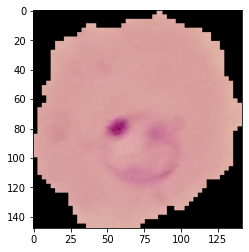

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
%matplotlib inline
 
# Read in the image
image = cv2.imread('/content/C100P61ThinF_IMG_20150918_144104_cell_162.png')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

In [80]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

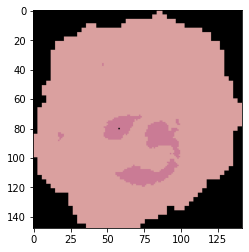

In [81]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)


In [82]:
lower, upper = [[248, 131, 121], [227, 115, 131]]
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")
mask = cv2.inRange(segmented_image, lower, upper)
output1 = cv2.bitwise_and(image, image, mask = mask)

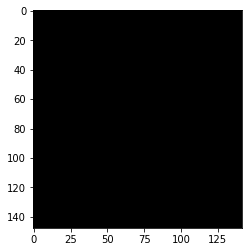

In [83]:
plt.imshow(output1)

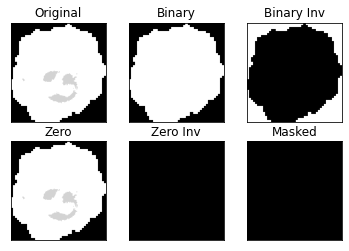

In [77]:
th = 0
max_val = 255
lower, upper = [[180, 18, 230], [0, 0, 40]]
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")
mask = cv2.inRange(segmented_image, lower, upper)
output1 = cv2.bitwise_and(image, image, mask = mask)
segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)


ret, o1 = cv2.threshold(segmented_image, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
ret, o2 = cv2.threshold(segmented_image, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
ret, o3 = cv2.threshold(segmented_image, th, max_val, cv2.THRESH_TOZERO + cv2.THRESH_OTSU )
ret, o4 = cv2.threshold(segmented_image, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
#ret, o5 = cv2.threshold(segmented_image, th, max_val, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )
# create NumPy arrays from the boundaries
    
output = [segmented_image, o1, o2, o3, o4, output1]
    
titles = ['Original', 'Binary', 'Binary Inv',
              'Zero', 'Zero Inv', 'Masked']
    
for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(output[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])

plt.show()  